<a href="https://colab.research.google.com/github/seungeunlee00/JUNIA/blob/main/MH/Local_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement your first S-metaheuristic algorithm – The Local Search Algorithm (LS)

Develop the selection strategies and the
neighborhood generation methods

Apply it for

• The example of maximization function (slide 36, x in
[0,31])

• Give the obtained solution for each selection strategy
and neighborhood generation

• Show the associated search trajectory curve

• Test the TSP problem – Data available on the campus

1. my code

In [ ]:
from random import *

x=[0, 31]
#x0=randint(0, 31) #initial x in integer
x0=17 
x0bin=['0','0','0','0','0'] #initial x in binary
y0=x0*x0*x0 - 60*x0*x0 + 900*x0 #initial solution
n=[0,0,0,0,0] #neighbor in integer
nbin=[0,0,0,0,0] #neighbor in binary
ny=[0,0,0,0,0] #neighbor's y

#change initial solution integer to binary
a=x0
b=[]
while a>0: 
   div = a//2
   mod = a%2
   a=div
   b += str(mod)

for i in range(0, 5):
  x0bin[i] = b[i]

print('initial : (',x0,',',y0,')', x0bin)

#make neighbor in binary
for i in range(0, 5):
  nbin[i] = x0bin.copy()

for i in range(0, 5):
  if(x0bin[i]=='0'):
    nbin[i][i]='1'
  else:
    nbin[i][i]='0'

print('Neighbor Binary:', nbin)

#change neighbor binary to integer
for i in range(0, 5):
    n[i] = int(nbin[i][0])*16 + int(nbin[i][1])*8 + int(nbin[i][2])*4 + int(nbin[i][3])*2 + int(nbin[i][4])*1

print('Neighbor Integer:', n)

#calculate y of neighbor
for i in range(0, 5):
  ny[i] = n[i]*n[i]*n[i] - 60*n[i]*n[i] + 900*n[i]
print('Neighbor answer:', ny)

if(max(ny)>y0):
  print(max(ny))
else:
  print(ny)
  

initial : ( 17 , 2873 ) ['1', '0', '0', '0', '1']
Neighbor Binary: [['0', '0', '0', '0', '1'], ['1', '1', '0', '0', '1'], ['1', '0', '1', '0', '1'], ['1', '0', '0', '1', '1'], ['1', '0', '0', '0', '0']]
Neighbor Integer: [1, 25, 21, 19, 16]
Neighbor answer: [841, 625, 1701, 2299, 3136]
3136


2. Solution

In [ ]:
import numpy as np
import random as r
import matplotlib.pyplot as plt

def fn(x):
    return x**3 - 60*x**2 + 900*x

def to_bin(x):
    b=[0,0,0,0,0]
    i=-1
    while x//2!=0:
        b[i]=x%2
        x=x//2
        i=i-1
    b[i]=1
    return b
def to_dec(b):
    x = 0
    i=-1
    for y in b:
        x = x+y*2**(5+i)
        i = i-1
    return x

def hamming(s):
    b = to_bin(s[0])
    print(b)
    s_ = []
    for i in range(5):
        a = b.copy()
        a[i] = int(not a[i])
        print(a)
        x = to_dec(a)
        s_.append([x,fn(x)])
    return s_

def best_select(n,s):
    for s_ in n:
        if s_[1] > s[1]:
            s = s_.copy()
    return s
def first_select(n,s):
    for s_ in n:
        if s_[1] > s[1]:
            s = s_.copy()
            break
    return s
def rand_select(n,s):
    nn = r.shuffle(n)
    for s_ in r.sample(n,len(n)):
        if s_[1] > s[1]:
            s = s_.copy()
            break
    return s

In [ ]:
x=r.randint(0,31)
s = [x,fn(x)]
print(s)
i=0
while i<5:
    print('----hamming----')
    n = hamming(s)
    print(n)
    s_ = first_select(n,s)
    #s_ = best_select(n,s)
    #s_ = rand_select(n,s)
    if s_ == s:
        break
    else:
        print('----select----')
        s = s_
    print(s)
    i=i+1
print('----final result----')
print(s)

[31, 31]
----hamming----
[1, 1, 1, 1, 1]
[0, 1, 1, 1, 1]
[1, 0, 1, 1, 1]
[1, 1, 0, 1, 1]
[1, 1, 1, 0, 1]
[1, 1, 1, 1, 0]
[[15, 3375], [23, 1127], [27, 243], [29, 29], [30, 0]]
----select----
[15, 3375]
----hamming----
[0, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[0, 0, 1, 1, 1]
[0, 1, 0, 1, 1]
[0, 1, 1, 0, 1]
[0, 1, 1, 1, 0]
[[31, 31], [7, 3703], [11, 3971], [13, 3757], [14, 3584]]
----select----
[7, 3703]
----hamming----
[0, 0, 1, 1, 1]
[1, 0, 1, 1, 1]
[0, 1, 1, 1, 1]
[0, 0, 0, 1, 1]
[0, 0, 1, 0, 1]
[0, 0, 1, 1, 0]
[[23, 1127], [15, 3375], [3, 2187], [5, 3125], [6, 3456]]
----final result----
[7, 3703]


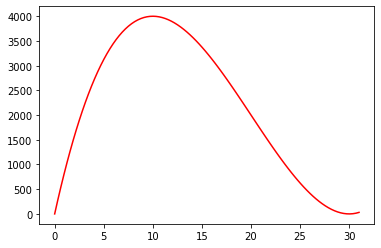

In [ ]:
x = np.linspace(0,31,100)
y = fn(x)

plt.plot(x,y, 'r')
plt.show()